In [1]:
!pip install ipython-sql


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 21.4 MB/s eta 0:00:00


In [2]:
%load_ext sql


In [3]:
import pandas as pd
import sqlite3


In [6]:
df = pd.read_csv('/content/MTA_Bus_Automated_Camera_Enforcement_Violations__Beginning_October_2019_20250919.csv')

In [7]:
df.shape[0]
# only loaded 577352 of primary data

577352

In [8]:
df.head()

,Violation ID,Vehicle ID,First Occurrence,Last Occurrence,Violation Status,Violation Type,Bus Route ID,Violation Latitude,Violation Longitude,Stop ID,Stop Name,Bus Stop Latitude,Bus Stop Longitude,Violation Georeference,Bus Stop Georeference
0,489749182,c5ae1411153b52556a1e648cc80d718aa519a4bdd189ab...,08/20/2025 11:12:08 PM,08/21/2025 12:24:08 AM,TECHNICAL ISSUE/OTHER,MOBILE BUS STOP,BX36,40.840509,-73.881189,102498.0,EAST TREMONT AV/VYSE AV,40.841076,-73.882483,POINT (-73.881189 40.840509),POINT (-73.882483 40.841076)
1,489744714,df9044acf85cf55488aea4cd3ce1d0e17ef050551726b6...,08/20/2025 11:48:59 PM,08/20/2025 11:54:47 PM,EXEMPT - BUS/PARATRANSIT,MOBILE BUS STOP,BX28,40.874017,-73.890646,100080.0,PAUL AV/BEDFORD PARK BLVD,40.874629,-73.891539,POINT (-73.890646 40.874017),POINT (-73.891539 40.874629)
2,489743631,eb5a337966ba65f66ab1db8e169d2446a4fb429b0efc63...,08/20/2025 10:33:13 PM,08/20/2025 11:56:02 PM,TECHNICAL ISSUE/OTHER,MOBILE DOUBLE PARKED,Q53+,40.721971,-73.867136,550473.0,WOODHAVEN BLVD/PENELOPE AV,40.722487,-73.867736,POINT (-73.867136 40.721971),POINT (-73.867736 40.722487)
3,489741945,3f877f70d9b253515a945be807c9c62d5814949f810310...,08/20/2025 10:50:45 PM,08/20/2025 11:32:43 PM,EXEMPT - OTHER,MOBILE BUS STOP,Q44+,40.762529,-73.831728,501140.0,UNION ST/35 AV,40.765422,-73.827944,POINT (-73.831728 40.762529),POINT (-73.827944 40.765422)
4,489741940,7feac037b62d591ffb1214e356157f3dd197fc22fee5bb...,08/20/2025 10:52:57 AM,08/20/2025 11:16:57 AM,EXEMPT - EMERGENCY VEHICLE,MOBILE BUS STOP,M101,40.815113,-73.955040,401458.0,AMSTERDAM AV/W 131 ST,40.816009,-73.954424,POINT (-73.95504 40.815113),POINT (-73.954424 40.816009)


In [9]:
conn = sqlite3.connect(':memory:')  # Use ':memory:' to create a database in RAM

In [10]:
df.to_sql('recordsAll', conn, index=False, if_exists='replace')

577352

In [12]:
df.rename(columns={
    'Violation ID': 'id',
    'Vehicle ID': 'vehicle',
    'First Occurrence': 'foccu',
    'Last Occurrence': 'loccu',
    'Violation Status': 'status',
    'Violation Type': 'type',
    'Bus Route ID':'busId',
    'Violation Latitude':'latitude',
    'Violation Longitude':'longitude',
    'Stop ID':'stopId',
    'Stop Name':'stopName',
    'Bus Stop Latitude': 'busLat',
    'Bus Stop Longitude':'busLon',
    'Violation Georeference':'vgeo',
    'Bus Stop Georeference':'sgeo'
}, inplace=True)

df.head()

,id,vehicle,foccu,loccu,status,type,busId,latitude,longitude,stopId,stopName,busLat,busLon,vgeo,sgeo
0,489749182,c5ae1411153b52556a1e648cc80d718aa519a4bdd189ab...,08/20/2025 11:12:08 PM,08/21/2025 12:24:08 AM,TECHNICAL ISSUE/OTHER,MOBILE BUS STOP,BX36,40.840509,-73.881189,102498.0,EAST TREMONT AV/VYSE AV,40.841076,-73.882483,POINT (-73.881189 40.840509),POINT (-73.882483 40.841076)
1,489744714,df9044acf85cf55488aea4cd3ce1d0e17ef050551726b6...,08/20/2025 11:48:59 PM,08/20/2025 11:54:47 PM,EXEMPT - BUS/PARATRANSIT,MOBILE BUS STOP,BX28,40.874017,-73.890646,100080.0,PAUL AV/BEDFORD PARK BLVD,40.874629,-73.891539,POINT (-73.890646 40.874017),POINT (-73.891539 40.874629)
2,489743631,eb5a337966ba65f66ab1db8e169d2446a4fb429b0efc63...,08/20/2025 10:33:13 PM,08/20/2025 11:56:02 PM,TECHNICAL ISSUE/OTHER,MOBILE DOUBLE PARKED,Q53+,40.721971,-73.867136,550473.0,WOODHAVEN BLVD/PENELOPE AV,40.722487,-73.867736,POINT (-73.867136 40.721971),POINT (-73.867736 40.722487)
3,489741945,3f877f70d9b253515a945be807c9c62d5814949f810310...,08/20/2025 10:50:45 PM,08/20/2025 11:32:43 PM,EXEMPT - OTHER,MOBILE BUS STOP,Q44+,40.762529,-73.831728,501140.0,UNION ST/35 AV,40.765422,-73.827944,POINT (-73.831728 40.762529),POINT (-73.827944 40.765422)
4,489741940,7feac037b62d591ffb1214e356157f3dd197fc22fee5bb...,08/20/2025 10:52:57 AM,08/20/2025 11:16:57 AM,EXEMPT - EMERGENCY VEHICLE,MOBILE BUS STOP,M101,40.815113,-73.955040,401458.0,AMSTERDAM AV/W 131 ST,40.816009,-73.954424,POINT (-73.95504 40.815113),POINT (-73.954424 40.816009)


In [23]:
query = """
SELECT "Bus Route ID", COUNT(*) AS count
FROM recordsAll
GROUP BY "Bus Route ID"
ORDER BY count DESC
"""

result_df = pd.read_sql_query(query, conn)

# Display the result
result_df


,Bus Route ID,count
0,M101,75858
1,BX19,45061
2,M100,43182
3,M15+,41993
4,BX36,31766
5,B35,23612
6,M2,21427
7,BX41+,20702
8,Q44+,20513
9,BX6+,20185


In [30]:
# brooklyn and queens buses
# Filter out Brooklyn and Queens buses
df.columns = df.columns.str.strip()
df = df[df["busId"].notna()] # drop null busid
# Filter busId using regex: "B" followed by digit, OR "Q" at the start
pattern = r'^(B[0-9]|Q)'

brooklyn_queens_df = df[df["busId"].str.match(pattern, na=False)]


In [31]:
brooklyn_queens_df.head()

,id,vehicle,foccu,loccu,status,type,busId,latitude,longitude,stopId,stopName,busLat,busLon,vgeo,sgeo
2,489743631,eb5a337966ba65f66ab1db8e169d2446a4fb429b0efc63...,08/20/2025 10:33:13 PM,08/20/2025 11:56:02 PM,TECHNICAL ISSUE/OTHER,MOBILE DOUBLE PARKED,Q53+,40.721971,-73.867136,550473.0,WOODHAVEN BLVD/PENELOPE AV,40.722487,-73.867736,POINT (-73.867136 40.721971),POINT (-73.867736 40.722487)
3,489741945,3f877f70d9b253515a945be807c9c62d5814949f810310...,08/20/2025 10:50:45 PM,08/20/2025 11:32:43 PM,EXEMPT - OTHER,MOBILE BUS STOP,Q44+,40.762529,-73.831728,501140.0,UNION ST/35 AV,40.765422,-73.827944,POINT (-73.831728 40.762529),POINT (-73.827944 40.765422)
7,489741885,f8f5cc735e84092b5cd07a0a19e39251d551d561afa5eb...,08/20/2025 10:44:38 PM,08/20/2025 11:39:04 PM,EXEMPT - BUS/PARATRANSIT,MOBILE BUS STOP,B46+,40.668480,-73.931146,303672.0,MALCOLM X BLVD/FULTON ST,40.679421,-73.929000,POINT (-73.931146 40.66848),POINT (-73.929 40.679421)
8,489741827,a32e659768e024c09ef4c94af4098f55278a93bd6ac8ab...,08/20/2025 11:19:02 PM,08/20/2025 11:24:43 PM,EXEMPT - EMERGENCY VEHICLE,MOBILE BUS LANE,Q69,40.761465,-73.935261,550680.0,21 ST/35 AV,40.761320,-73.935394,POINT (-73.935261 40.761465),POINT (-73.935394 40.76132)
9,489741818,9efab913d2329aae1a294cc0316679b86dcdccc7e7294f...,08/20/2025 11:15:31 PM,08/20/2025 11:19:56 PM,EXEMPT - BUS/PARATRANSIT,MOBILE BUS STOP,Q44+,40.705292,-73.809492,502137.0,SUTPHIN BLVD/HILLSIDE AV,40.705382,-73.809594,POINT (-73.809492 40.705292),POINT (-73.809594 40.705382)


In [36]:
brooklyn_queens_df['foccu'] = pd.to_datetime(brooklyn_queens_df['foccu'], errors='coerce')
# find earliest year
# Extract the year from 'foccu' and find the earliest year
earliest_year = brooklyn_queens_df['foccu'].dt.year.min()
earliest_month = brooklyn_queens_df['foccu'].dt.month.min()
latest_month = brooklyn_queens_df['foccu'].dt.month.max()
print("Earliest year:", earliest_year," Earliest month: ", earliest_month, " Latest month: ", latest_month)



Earliest year: 2025  Earliest month:  5  Latest month:  8


/tmp/ipython-input-3724326906.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brooklyn_queens_df['foccu'] = pd.to_datetime(brooklyn_queens_df['foccu'], errors='coerce')


In [60]:
from geopy.geocoders import Nominatim

geolocator = Nominatim(user_agent="my_geocoder")
location = geolocator.reverse((40.747143, -73.943510), exactly_one=True)
print(location.address)


Citigroup Building, 25-01, Jackson Avenue, Long Island City, Queens, Queens County, City of New York, New York, 11101, United States


In [62]:
# definition of neighborhood close together is 10 min walks, so about 0.5 miles or 0.8 kilometers
from geopy.distance import geodesic

# Example list of 7 reference coordinates (latitude, longitude) for 9 cuny Brooklyn and queens campuses
reference_points = [
    (40.6312, -73.9532),
    (40.6953, -73.9870),
    (40.5783, -73.9350),
    (40.7361, -73.8170),
    (40.7429, -73.9338),
    (40.7543, -73.7593),
    (40.7007,-73.7961),
    (40.6664998, -73.9575858)

]

# Example: df with latitude and longitude columns
# Make sure your DataFrame has 'latitude' and 'longitude' columns
# df = pd.read_csv("your_data.csv")  # or however you load it

# Function to check if a point is within 0.8 km of any reference point
def is_within_radius(row, reference_points, radius_km=0.8):
    point = (row['latitude'], row['longitude'])
    for ref in reference_points:
        if geodesic(point, ref).km <= radius_km:
            return True
    return False

# Apply the function to each row
brooklyn_queens_df['is_close'] = brooklyn_queens_df.apply(lambda row: is_within_radius(row, reference_points), axis=1)
# Split the DataFrame
df_close = brooklyn_queens_df[brooklyn_queens_df['is_close']].copy()
df_far = brooklyn_queens_df[~brooklyn_queens_df['is_close']].copy()
# Drop helper column if desired
df_close.drop(columns=['is_close'], inplace=True)
df_far.drop(columns=['is_close'], inplace=True)


/tmp/ipython-input-2392491902.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brooklyn_queens_df['is_close'] = brooklyn_queens_df.apply(lambda row: is_within_radius(row, reference_points), axis=1)


In [ ]:
from geopy.geocoders import Nominatim

geolocator = Nominatim(user_agent="my_geocoder")
location = geolocator.reverse((40.747143, -73.943510), exactly_one=True)
print(location.address)


Citigroup Building, 25-01, Jackson Avenue, Long Island City, Queens, Queens County, City of New York, New York, 11101, United States


In [63]:
df_close.head()

,id,vehicle,foccu,loccu,status,type,busId,latitude,longitude,stopId,stopName,busLat,busLon,vgeo,sgeo
49,489740582,e9f61fd7d4d8df0a7d76bf2ac1b8c8b0d808cc51376310...,2025-08-20 22:12:48,08/20/2025 10:19:47 PM,EXEMPT - BUS/PARATRANSIT,MOBILE BUS STOP,Q44+,40.702592,-73.799399,503964.0,MERRICK BLVD/ARCHER AV,40.704907,-73.793306,POINT (-73.799399 40.702592),POINT (-73.793306 40.704907)
73,489739618,7ce8e226f5676fdcbd51a1d88fe6225ce4bc85b35c25e0...,2025-08-20 20:26:42,08/20/2025 08:41:52 PM,EXEMPT - BUS/PARATRANSIT,MOBILE BUS STOP,Q54,40.704189,-73.798105,504540.0,JAMAICA AV/165 ST,40.705635,-73.794763,POINT (-73.798105 40.704189),POINT (-73.794763 40.705635)
87,489739163,e8e4dc921004f56c6cc113126ee548719d826bea60d79f...,2025-08-20 19:51:40,08/20/2025 08:11:41 PM,DRIVER/VEHICLE INFO MISSING,MOBILE DOUBLE PARKED,B41,40.636450,-73.951520,303314.0,FLATBUSH AV / FOSTER AV,40.638118,-73.953572,POINT (-73.95152 40.63645),POINT (-73.953572 40.638118)
88,489739131,7bdf64a0daa96be515f72394d30a5e7466814abc9b6d3d...,2025-08-20 19:53:13,08/20/2025 08:10:01 PM,EXEMPT - BUS/PARATRANSIT,MOBILE BUS STOP,Q54,40.705483,-73.794862,505257.0,JAMAICA AV/PARSONS BLVD,40.703507,-73.799602,POINT (-73.794862 40.705483),POINT (-73.799602 40.703507)
93,489738982,c0b1be9effaa8bc7294527e304e7690b44bade4b9db814...,2025-08-20 19:41:43,08/20/2025 08:00:41 PM,EXEMPT - BUS/PARATRANSIT,MOBILE BUS LANE,B41,40.690737,-73.988560,307460.0,ADAMS ST/BROOKLYN SUPREME COURT,40.692560,-73.989131,POINT (-73.98856 40.690737),POINT (-73.989131 40.69256)


In [64]:
df_far.head()

,id,vehicle,foccu,loccu,status,type,busId,latitude,longitude,stopId,stopName,busLat,busLon,vgeo,sgeo
2,489743631,eb5a337966ba65f66ab1db8e169d2446a4fb429b0efc63...,2025-08-20 22:33:13,08/20/2025 11:56:02 PM,TECHNICAL ISSUE/OTHER,MOBILE DOUBLE PARKED,Q53+,40.721971,-73.867136,550473.0,WOODHAVEN BLVD/PENELOPE AV,40.722487,-73.867736,POINT (-73.867136 40.721971),POINT (-73.867736 40.722487)
3,489741945,3f877f70d9b253515a945be807c9c62d5814949f810310...,2025-08-20 22:50:45,08/20/2025 11:32:43 PM,EXEMPT - OTHER,MOBILE BUS STOP,Q44+,40.762529,-73.831728,501140.0,UNION ST/35 AV,40.765422,-73.827944,POINT (-73.831728 40.762529),POINT (-73.827944 40.765422)
7,489741885,f8f5cc735e84092b5cd07a0a19e39251d551d561afa5eb...,2025-08-20 22:44:38,08/20/2025 11:39:04 PM,EXEMPT - BUS/PARATRANSIT,MOBILE BUS STOP,B46+,40.668480,-73.931146,303672.0,MALCOLM X BLVD/FULTON ST,40.679421,-73.929000,POINT (-73.931146 40.66848),POINT (-73.929 40.679421)
8,489741827,a32e659768e024c09ef4c94af4098f55278a93bd6ac8ab...,2025-08-20 23:19:02,08/20/2025 11:24:43 PM,EXEMPT - EMERGENCY VEHICLE,MOBILE BUS LANE,Q69,40.761465,-73.935261,550680.0,21 ST/35 AV,40.761320,-73.935394,POINT (-73.935261 40.761465),POINT (-73.935394 40.76132)
9,489741818,9efab913d2329aae1a294cc0316679b86dcdccc7e7294f...,2025-08-20 23:15:31,08/20/2025 11:19:56 PM,EXEMPT - BUS/PARATRANSIT,MOBILE BUS STOP,Q44+,40.705292,-73.809492,502137.0,SUTPHIN BLVD/HILLSIDE AV,40.705382,-73.809594,POINT (-73.809492 40.705292),POINT (-73.809594 40.705382)


In [65]:
connTwo = sqlite3.connect(':memory:')  # Use ':memory:' to create a database in RAM
df_far.to_sql('farcunyCampus', connTwo, index=False, if_exists='replace')
df_far.head()


,id,vehicle,foccu,loccu,status,type,busId,latitude,longitude,stopId,stopName,busLat,busLon,vgeo,sgeo
2,489743631,eb5a337966ba65f66ab1db8e169d2446a4fb429b0efc63...,2025-08-20 22:33:13,08/20/2025 11:56:02 PM,TECHNICAL ISSUE/OTHER,MOBILE DOUBLE PARKED,Q53+,40.721971,-73.867136,550473.0,WOODHAVEN BLVD/PENELOPE AV,40.722487,-73.867736,POINT (-73.867136 40.721971),POINT (-73.867736 40.722487)
3,489741945,3f877f70d9b253515a945be807c9c62d5814949f810310...,2025-08-20 22:50:45,08/20/2025 11:32:43 PM,EXEMPT - OTHER,MOBILE BUS STOP,Q44+,40.762529,-73.831728,501140.0,UNION ST/35 AV,40.765422,-73.827944,POINT (-73.831728 40.762529),POINT (-73.827944 40.765422)
7,489741885,f8f5cc735e84092b5cd07a0a19e39251d551d561afa5eb...,2025-08-20 22:44:38,08/20/2025 11:39:04 PM,EXEMPT - BUS/PARATRANSIT,MOBILE BUS STOP,B46+,40.668480,-73.931146,303672.0,MALCOLM X BLVD/FULTON ST,40.679421,-73.929000,POINT (-73.931146 40.66848),POINT (-73.929 40.679421)
8,489741827,a32e659768e024c09ef4c94af4098f55278a93bd6ac8ab...,2025-08-20 23:19:02,08/20/2025 11:24:43 PM,EXEMPT - EMERGENCY VEHICLE,MOBILE BUS LANE,Q69,40.761465,-73.935261,550680.0,21 ST/35 AV,40.761320,-73.935394,POINT (-73.935261 40.761465),POINT (-73.935394 40.76132)
9,489741818,9efab913d2329aae1a294cc0316679b86dcdccc7e7294f...,2025-08-20 23:15:31,08/20/2025 11:19:56 PM,EXEMPT - BUS/PARATRANSIT,MOBILE BUS STOP,Q44+,40.705292,-73.809492,502137.0,SUTPHIN BLVD/HILLSIDE AV,40.705382,-73.809594,POINT (-73.809492 40.705292),POINT (-73.809594 40.705382)


In [77]:
connOne = sqlite3.connect(':memory:')  # Use ':memory:' to create a database in RAM
df_close.to_sql('closecunyCampus', connOne, index=False, if_exists='replace')
df_close.head()


,id,vehicle,foccu,loccu,status,type,busId,latitude,longitude,stopId,stopName,busLat,busLon,vgeo,sgeo
49,489740582,e9f61fd7d4d8df0a7d76bf2ac1b8c8b0d808cc51376310...,2025-08-20 22:12:48,08/20/2025 10:19:47 PM,EXEMPT - BUS/PARATRANSIT,MOBILE BUS STOP,Q44+,40.702592,-73.799399,503964.0,MERRICK BLVD/ARCHER AV,40.704907,-73.793306,POINT (-73.799399 40.702592),POINT (-73.793306 40.704907)
73,489739618,7ce8e226f5676fdcbd51a1d88fe6225ce4bc85b35c25e0...,2025-08-20 20:26:42,08/20/2025 08:41:52 PM,EXEMPT - BUS/PARATRANSIT,MOBILE BUS STOP,Q54,40.704189,-73.798105,504540.0,JAMAICA AV/165 ST,40.705635,-73.794763,POINT (-73.798105 40.704189),POINT (-73.794763 40.705635)
87,489739163,e8e4dc921004f56c6cc113126ee548719d826bea60d79f...,2025-08-20 19:51:40,08/20/2025 08:11:41 PM,DRIVER/VEHICLE INFO MISSING,MOBILE DOUBLE PARKED,B41,40.636450,-73.951520,303314.0,FLATBUSH AV / FOSTER AV,40.638118,-73.953572,POINT (-73.95152 40.63645),POINT (-73.953572 40.638118)
88,489739131,7bdf64a0daa96be515f72394d30a5e7466814abc9b6d3d...,2025-08-20 19:53:13,08/20/2025 08:10:01 PM,EXEMPT - BUS/PARATRANSIT,MOBILE BUS STOP,Q54,40.705483,-73.794862,505257.0,JAMAICA AV/PARSONS BLVD,40.703507,-73.799602,POINT (-73.794862 40.705483),POINT (-73.799602 40.703507)
93,489738982,c0b1be9effaa8bc7294527e304e7690b44bade4b9db814...,2025-08-20 19:41:43,08/20/2025 08:00:41 PM,EXEMPT - BUS/PARATRANSIT,MOBILE BUS LANE,B41,40.690737,-73.988560,307460.0,ADAMS ST/BROOKLYN SUPREME COURT,40.692560,-73.989131,POINT (-73.98856 40.690737),POINT (-73.989131 40.69256)


In [74]:
print(brooklyn_queens_df.shape[0])
print(df_close.shape[0])
print(df_far.shape[0])

171929
22518
149411


In [79]:
queryOne = """
SELECT "status", COUNT(*) AS count
FROM closecunyCampus
WHERE "status" LIKE '%EXEMPT%' OR "status" LIKE '%TECHNICAL ISSUE/OTHER%'
GROUP BY "status"
ORDER BY count DESC
"""

result_df = pd.read_sql_query(queryOne, connOne)

# Display the result
result_df

,status,count
0,EXEMPT - BUS/PARATRANSIT,3037
1,EXEMPT - EMERGENCY VEHICLE,2921
2,EXEMPT - OTHER,1426
3,TECHNICAL ISSUE/OTHER,1246
4,EXEMPT - COMMERCIAL UNDER 20,890


In [76]:
queryTwo = """
SELECT "status", COUNT(*) AS count
FROM farcunyCampus
WHERE "status" LIKE '%EXEMPT%' OR "status" LIKE '%TECHNICAL ISSUE/OTHER%'
GROUP BY "status"
ORDER BY count DESC
"""

result_df = pd.read_sql_query(queryTwo, connTwo)

# Display the result
result_df


,status,count
0,TECHNICAL ISSUE/OTHER,13994
1,EXEMPT - EMERGENCY VEHICLE,9711
2,EXEMPT - COMMERCIAL UNDER 20,9335
3,EXEMPT - BUS/PARATRANSIT,7946
4,EXEMPT - OTHER,5945


| Status                       | Count | % of total |
| ---------------------------- | ----- | ---------- |
| EXEMPT - BUS/PARATRANSIT     | 3,037 | **13.5%**  |
| EXEMPT - EMERGENCY VEHICLE   | 2,921 | **13.0%**  |
| EXEMPT - OTHER               | 1,426 | **6.3%**   |
| TECHNICAL ISSUE/OTHER        | 1,246 | **5.5%**   |
| EXEMPT - COMMERCIAL UNDER 20 | 890   | **4.0%**   |


| Status                       | % Near CUNY | % Far from CUNY | Notes                         |
| ---------------------------- | ----------- | --------------- | ----------------------------- |
| EXEMPT - BUS/PARATRANSIT     | 13.5%       | 5.3%            | Much **higher near** campuses |
| EXEMPT - EMERGENCY VEHICLE   | 13.0%       | 6.5%            | Higher near campuses          |
| EXEMPT - OTHER               | 6.3%        | 4.0%            | Slightly higher near campuses |
| TECHNICAL ISSUE/OTHER        | 5.5%        | 9.4%            | Higher **far** from campuses  |
| EXEMPT - COMMERCIAL UNDER 20 | 4.0%        | 6.2%            | Higher far from campuses      |


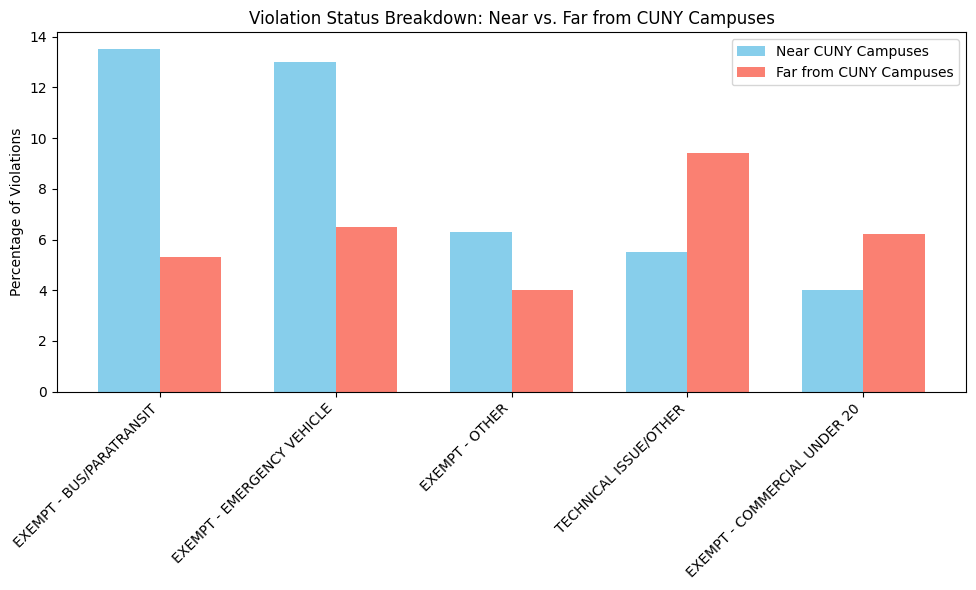

In [80]:
import matplotlib.pyplot as plt

# Create the data as a dictionary
data = {
    'Violation Status': [
        'EXEMPT - BUS/PARATRANSIT',
        'EXEMPT - EMERGENCY VEHICLE',
        'EXEMPT - OTHER',
        'TECHNICAL ISSUE/OTHER',
        'EXEMPT - COMMERCIAL UNDER 20'
    ],
    'Near CUNY (%)': [13.5, 13.0, 6.3, 5.5, 4.0],
    'Far from CUNY (%)': [5.3, 6.5, 4.0, 9.4, 6.2]
}

# Create DataFrame
df_plot = pd.DataFrame(data)

# Plot setup
plt.figure(figsize=(10, 6))
bar_width = 0.35
x = range(len(df_plot))

# Bar plots
plt.bar([i - bar_width/2 for i in x], df_plot['Near CUNY (%)'], width=bar_width, label='Near CUNY Campuses', color='skyblue')
plt.bar([i + bar_width/2 for i in x], df_plot['Far from CUNY (%)'], width=bar_width, label='Far from CUNY Campuses', color='salmon')

# Labels and titles
plt.xticks(ticks=x, labels=df_plot['Violation Status'], rotation=45, ha='right')
plt.ylabel('Percentage of Violations')
plt.title('Violation Status Breakdown: Near vs. Far from CUNY Campuses')
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()


In [81]:
df_close['foccu'] = pd.to_datetime(df_close['foccu'], errors='coerce')
df_close['loccu'] = pd.to_datetime(df_close['loccu'], errors='coerce')

df_far['foccu'] = pd.to_datetime(df_far['foccu'], errors='coerce')
df_far['loccu'] = pd.to_datetime(df_far['loccu'], errors='coerce')


/tmp/ipython-input-1440812216.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_close['loccu'] = pd.to_datetime(df_close['loccu'], errors='coerce')
/tmp/ipython-input-1440812216.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_far['loccu'] = pd.to_datetime(df_far['loccu'], errors='coerce')


In [84]:
# filter out rows where loccu is missing or before foccu (bad data)
# For violations near CUNY campuses
df_close = df_close[
    df_close['loccu'].notna() &
    (df_close['loccu'] >= df_close['foccu'])
]

# For violations far from CUNY campuses
df_far = df_far[
    df_far['loccu'].notna() &
    (df_far['loccu'] >= df_far['foccu'])
]


df_close['resolution_time'] = (df_close['loccu'] - df_close['foccu']).dt.total_seconds() / 3600  # hours
df_far['resolution_time'] = (df_far['loccu'] - df_far['foccu']).dt.total_seconds() / 3600  # hours


In [85]:
avg_close = df_close['resolution_time'].mean()
avg_far = df_far['resolution_time'].mean()

print(f"Average resolution time near CUNY campuses: {avg_close:.2f} hours")
print(f"Average resolution time far from CUNY campuses: {avg_far:.2f} hours")


Average resolution time near CUNY campuses: 0.45 hours
Average resolution time far from CUNY campuses: 0.37 hours


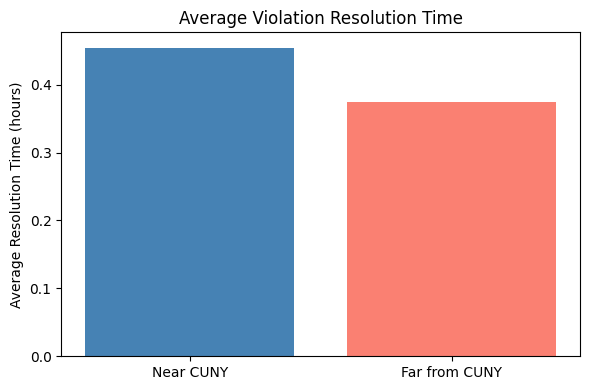

In [86]:

plt.figure(figsize=(6, 4))
plt.bar(['Near CUNY', 'Far from CUNY'], [avg_close, avg_far], color=['steelblue', 'salmon'])
plt.ylabel('Average Resolution Time (hours)')
plt.title('Average Violation Resolution Time')
plt.tight_layout()
plt.show()


In [87]:
median_close = df_close['resolution_time'].median()
median_far = df_far['resolution_time'].median()

print(f"Median resolution time near CUNY: {median_close:.2f} hours")
print(f"Median resolution time far from CUNY: {median_far:.2f} hours")


Median resolution time near CUNY: 0.15 hours
Median resolution time far from CUNY: 0.14 hours


In [88]:
# Group by status and calculate average & median resolution times

close_stats = df_close.groupby('status')['resolution_time'].agg(['count', 'mean', 'median']).reset_index()
far_stats = df_far.groupby('status')['resolution_time'].agg(['count', 'mean', 'median']).reset_index()

# Rename columns for clarity
close_stats.columns = ['status', 'count_close', 'mean_close', 'median_close']
far_stats.columns = ['status', 'count_far', 'mean_far', 'median_far']


In [89]:
# Merge both dataframes on the status column
status_comparison = pd.merge(close_stats, far_stats, on='status', how='outer').fillna(0)

# Optional: Sort by highest avg resolution time near CUNY
status_comparison = status_comparison.sort_values(by='mean_close', ascending=False)


In [90]:
status_comparison[['status', 'mean_close', 'mean_far', 'median_close', 'median_far']]


,status,mean_close,mean_far,median_close,median_far
1,EXEMPT - BUS/PARATRANSIT,0.674905,0.651836,0.105000,0.140278
4,EXEMPT - OTHER,0.628595,0.496647,0.216528,0.200556
0,DRIVER/VEHICLE INFO MISSING,0.616660,0.510722,0.176944,0.160556
5,TECHNICAL ISSUE/OTHER,0.531042,0.435483,0.183472,0.173333
3,EXEMPT - EMERGENCY VEHICLE,0.530564,0.434286,0.197500,0.172222
6,VIOLATION ISSUED,0.335300,0.321954,0.144167,0.128889
2,EXEMPT - COMMERCIAL UNDER 20,0.181931,0.187336,0.126111,0.109444


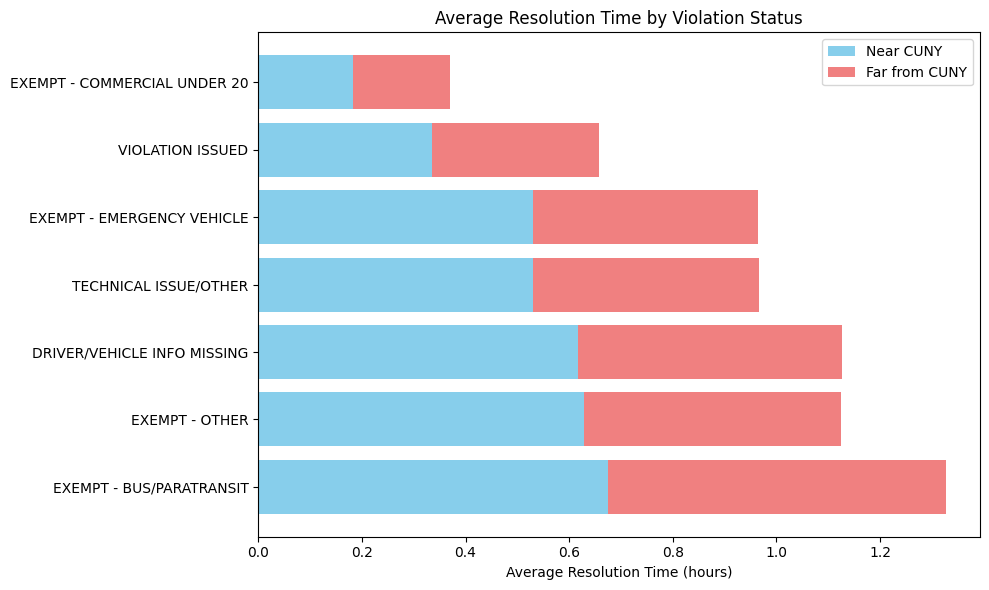

In [91]:

plt.figure(figsize=(10, 6))
plt.barh(status_comparison['status'], status_comparison['mean_close'], color='skyblue', label='Near CUNY')
plt.barh(status_comparison['status'], status_comparison['mean_far'], left=status_comparison['mean_close'], color='lightcoral', label='Far from CUNY')
plt.xlabel('Average Resolution Time (hours)')
plt.title('Average Resolution Time by Violation Status')
plt.legend()
plt.tight_layout()
plt.show()


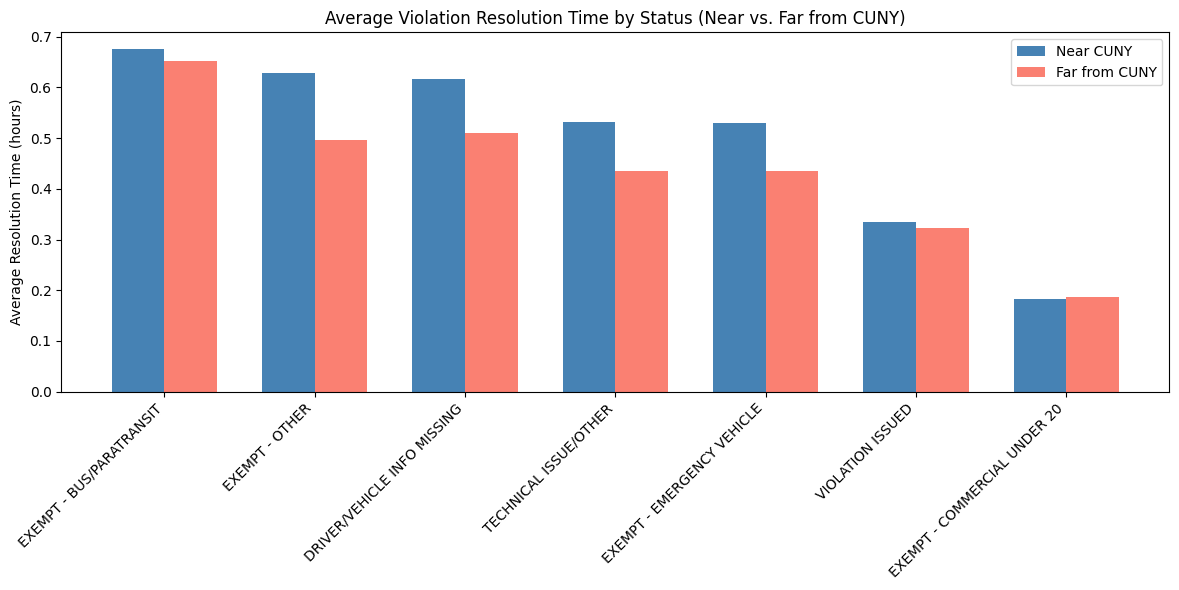

In [92]:
import numpy as np

# Set figure size
plt.figure(figsize=(12, 6))

# Define positions for grouped bars
statuses = status_comparison['status']
x = np.arange(len(statuses))  # label positions
width = 0.35  # width of each bar

# Create bars
plt.bar(x - width/2, status_comparison['mean_close'], width, label='Near CUNY', color='steelblue')
plt.bar(x + width/2, status_comparison['mean_far'], width, label='Far from CUNY', color='salmon')

# Add labels and title
plt.ylabel('Average Resolution Time (hours)')
plt.title('Average Violation Resolution Time by Status (Near vs. Far from CUNY)')
plt.xticks(x, statuses, rotation=45, ha='right')
plt.legend()

plt.tight_layout()
plt.show()